# 2.7 花哨的索引


In [1]:
import numpy as np

rand = np.random.RandomState(42)

x = rand.randint(100, size=10)

print(x)

[51 92 14 71 60 20 82 86 74 74]


In [2]:
# 假如要获取三个不同的元素，可以通过以下方式

print([x[3], x[7], x[2]])

[71, 86, 14]


In [3]:
# 通过传递一个索引的单个列表或者数组来获得同样的结果
ind = [3, 7, 4]
print(x[ind])

[71 86 60]


In [4]:
# 利用花哨的索引，结果形状与索引数组的形状一致

ind = np.array([[3, 7], [4, 5]])

print(x[ind])

[[71 86]
 [60 20]]


In [5]:
X = np.arange(12).reshape((3, 4))
print(X)

row = np.array([0, 1, 2])
col = np.array([2, 1, 3])

print(X[row, col])

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[ 2  5 11]


In [6]:
"""
这个花哨的索引会变成:

0 1 2
0 1 2
0 1 2

2 1 3
2 1 3
2 1 3

每一行和每一列的向量匹配

"""

print(X[row[:, np.newaxis], col])


[[ 2  1  3]
 [ 6  5  7]
 [10  9 11]]


## 组合索引

花哨的索引和简单的索引组合 `X[2, [2, 0, 1]]`

也可以和切片组合使用 `X[1:, [2, 0, 1]]`

也可以和掩码组合使用 `X[row[:, np.newaxis], mask]`


In [7]:
print(X)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [8]:
X[2, [2, 0, 1]]

array([10,  8,  9])

In [9]:
X[1:, [2, 0, 1]]

array([[ 6,  4,  5],
       [10,  8,  9]])

In [10]:
mask = np.array([1, 0, 1, 0], dtype=bool)

X[row[:, np.newaxis], mask]

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

## 选择随机点

通常用于快速分割数据，分割训练、测试数据集以验证统计模型。


In [11]:
mean = [0, 0]

cov = [[1, 2], [2, 5]]

Y = rand.multivariate_normal(mean, cov, 100)
print(Y.shape)

Y

(100, 2)


array([[-0.644508  , -0.46220608],
       [ 0.7376352 ,  1.21236921],
       [ 0.88151763,  1.12795177],
       [ 2.04998983,  5.97778598],
       [-0.1711348 , -2.06258746],
       [ 0.67956979,  0.83705124],
       [ 1.46860232,  1.22961093],
       [ 0.35282131,  1.49875397],
       [-2.51552505, -5.64629995],
       [ 0.0843329 , -0.3543059 ],
       [ 0.19199272,  1.48901291],
       [-0.02566217, -0.74987887],
       [ 1.00569227,  2.25287315],
       [ 0.49514263,  1.18939673],
       [ 0.0629872 ,  0.57349278],
       [ 0.75093031,  2.99487004],
       [-3.0236127 , -6.00766046],
       [-0.53943081, -0.3478899 ],
       [ 1.53817376,  1.99973464],
       [-0.50886808, -1.81099656],
       [ 1.58115602,  2.86410319],
       [ 0.99305043,  2.54294059],
       [-0.87753796, -1.15767204],
       [-1.11518048, -1.87508012],
       [ 0.4299908 ,  0.36324254],
       [ 0.97253528,  3.53815717],
       [ 0.32124996,  0.33137032],
       [-0.74618649, -2.77366681],
       [-0.88473953,

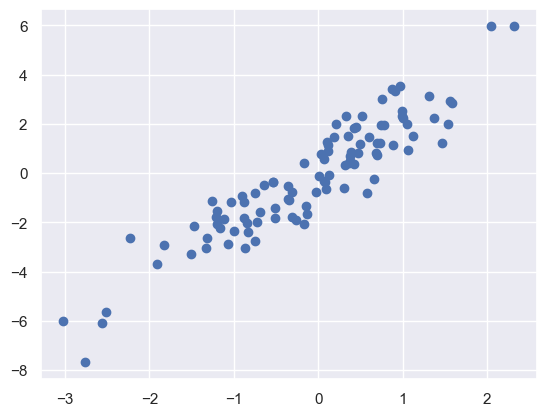

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn

seaborn.set()  # for plot styling

plt.scatter(Y[:, 0], Y[:, 1]);

In [13]:
indices = np.random.choice(Y.shape[0], 20, replace=False)

print(indices)

[77 18 64 19 90 24 69 11 79 51 37 74 57  5 55 35 48 66 31 41]


In [14]:
selection = Y[indices]
print(selection.shape)

(20, 2)


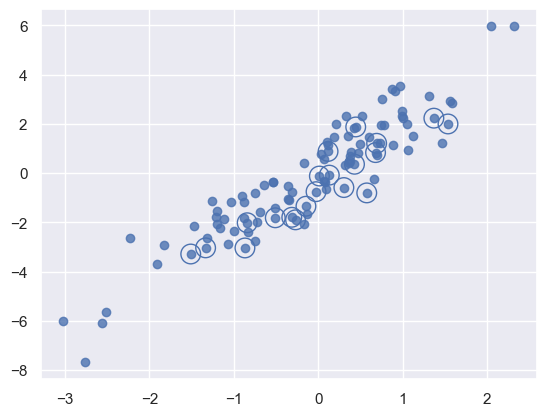

In [15]:
plt.scatter(Y[:, 0], Y[:, 1], alpha=0.8)
plt.scatter(selection[:, 0], selection[:, 1], facecolor='none', s=200, edgecolors='b');

## 2.7.4 用花哨的索引修改值



In [16]:
x = np.arange(10)

i = np.array([2, 1, 8, 4])
x[i] = 99
print(x)

[ 0 99 99  3 99  5  6  7 99  9]


In [17]:
x = np.arange(20).reshape((10, 2))
print(x)
print(x[i])
x[i] = [88, ]

print(x)

[[ 0  1]
 [ 2  3]
 [ 4  5]
 [ 6  7]
 [ 8  9]
 [10 11]
 [12 13]
 [14 15]
 [16 17]
 [18 19]]
[[ 4  5]
 [ 2  3]
 [16 17]
 [ 8  9]]
[[ 0  1]
 [88 88]
 [88 88]
 [ 6  7]
 [88 88]
 [10 11]
 [12 13]
 [14 15]
 [88 88]
 [18 19]]


In [18]:
x = np.zeros(10)

x[[0, 0]] = [4, 6]
print(x)

[6. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [19]:
"""
x[i] = x[i] + 1
数组并没有发生多次累加，而是发生了赋值。

"""

i = [2, 3, 3, 4, 4, 4]
x[i] += 1
print(x)

[6. 0. 1. 1. 1. 0. 0. 0. 0. 0.]


In [20]:
"""
累加，使用at来实现

"""
x = np.zeros(10)

np.add.at(x, i, 1)
print(x)

[0. 0. 1. 2. 3. 0. 0. 0. 0. 0.]


## 2.7.5 数据区间划分
